# Introduction

#StefanBIT2020

This web site is running a "Jupyter notebook," which allows you to execute interactive Octave
code directly in your browser. Each (part of a code) line preceeded by a percent symbol "%" is a code comment.

To execute any Octave commands, first enter the commands in a code cell, and then depress the "shift" and "enter" keys on your keyboard at the same time, making sure that your cursor is placed inside of the code cell.
I refer to this as "< shift \> < enter \>" in my instructions below.

The output from this notebook will be used to provide answers for this lesson's practice
quiz. As you proceed through the specialization, you will use more and more Jupyter notebooks
to write Octave code to implement battery-management-system algorithms.
 
此程序采用Octave/Matlab语言书写，基于G.Plett教授的课程，围绕  
COURSERA_Algorithms for Battery Management Systems  
    \Part2-Equivalent Circuit Cell Model Simulation  
        \WEEK2-Identifying parameters of static model  
展开，主要实现根据开路电压测试结果进行库伦效率和可用容量的计算，并拟定出OCV-SOC关系。  

This program is written in Octave / Matlab language, based on the course taught by G.Plett, around  
COURSERA_Algorithms for Battery Management Systems  
    \Part2-Equivalent Circuit Cell Model Simulation  
        \WEEK2-Identifying parameters of static model  
This program mainly implements the calculation of Coulomb efficiency and available capacity according to the results of the open-circuit voltage test, and draws up the OCV-SOC relationship.

In [2]:
% Place your cursor in this input code cell. Then, type < shift >< enter > to execute

% This loads the OCV Test Script data from storage for a 25 degC test
load E2_OCV_P25.mat

In [3]:
% The variable "OCVData" has been loaded by the previous input box. Place 
% your cursor in this input code cell and depress < shift >< enter >

whos

Variables in the current scope:

   Attr Name         Size                     Bytes  Class
   ==== ====         ====                     =====  ===== 
        OCVData      1x1                    2034720  struct
        ans          1x5                          5  char

Total is 6 elements using 2034725 bytes



**Do not attempt to display the `OCVData` variable!** It contains an enormous amount of data and will probably crash your web browser if you attempt to do so.
`OCVData` has four fields: `script1`, `script2`, `script3`, and `script4`. These contain data corresponding to the four test scripts you have learned about this week.  
`OCVData`是由开路电压测试中的四个脚本测试数据组成的（详情见相关PPT），其中具体建构如下：  
Each of these fields further has sub-fields holding the data of interest. These are: 

1) Data from OCV Test Script 1 (at test temperature, which is 25 degC here)

`OCVData.script1.time: [9429x1 double]
OCVData.script1.step: [9429x1 double]
OCVData.script1.current: [9429x1 double]
OCVData.script1.voltage: [9429x1 double]
OCVData.script1.chgAh: [9429x1 double]
OCVData.script1.disAh: [9429x1 double]`

2) Data from OCV Test Script 2 (at 25 degC)

`OCVData.script2.time: [11987x1 double]
OCVData.script2.step: [11987x1 double]
OCVData.script2.current: [11987x1 double]
OCVData.script2.voltage: [11987x1 double]
OCVData.script2.chgAh: [11987x1 double]
OCVData.script2.disAh: [11987x1 double]`

3) Data from OCV Test Script 3 (at test temperature, also 25 degC here)

`OCVData.script3.time: [9286x1 double]
OCVData.script3.step: [9286x1 double]
OCVData.script3.current: [9286x1 double]
OCVData.script3.voltage: [9286x1 double]
OCVData.script3.chgAh: [9286x1 double]
OCVData.script3.disAh: [9286x1 double]`

4) Finally, data from OCV Test Script 4 (at 25 degC)

`OCVData.script4.time: [11688x1 double]
OCVData.script4.step: [11688x1 double]
OCVData.script4.current: [11688x1 double]
OCVData.script4.voltage: [11688x1 double]
OCVData.script4.chgAh: [11688x1 double]
OCVData.script4.disAh: [11688x1 double]`

### Visualizing data
There is an enormous amount of data stored from these four cell tests. One good way to visualize the data is via plotting. For example:

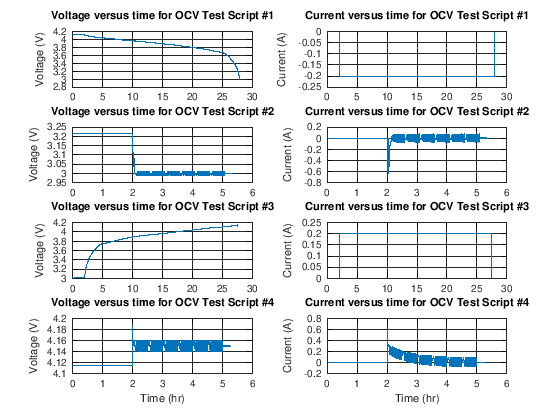

In [4]:
% Plot the voltage response from script 1
% Place your cursor in this input code cell. Then, type < shift >< enter > to execute
subplot(4,2,1)
plot(OCVData.script1.time/3600,OCVData.script1.voltage); % 3600 converts seconds into hours
title('Voltage versus time for OCV Test Script #1')
%xlabel('Time (hr)')
ylabel('Voltage (V)')
grid on
% Feel free to modify this code input cell to plot different things!

% Plot the voltage response from script 2
subplot(4,2,3)
plot(OCVData.script2.time/3600,OCVData.script2.voltage); % 3600 converts seconds into hours
title('Voltage versus time for OCV Test Script #2')
%xlabel('Time (hr)')
ylabel('Voltage (V)')
grid on

% Plot the current response from script 1
subplot(4,2,2)
plot(OCVData.script1.time/3600,OCVData.script1.current); % 3600 converts seconds into hours
title('Current versus time for OCV Test Script #1')
%xlabel('Time (hr)')
ylabel('Current (A)')
grid on

% Plot the current response from script 2
subplot(4,2,4)
plot(OCVData.script2.time/3600,OCVData.script2.current); % 3600 converts seconds into hours
title('Current versus time for OCV Test Script #2')
%xlabel('Time (hr)')
ylabel('Current (A)')
grid on

% Plot the voltage response from script 3
subplot(4,2,5)
plot(OCVData.script3.time/3600,OCVData.script3.voltage); % 3600 converts seconds into hours
title('Voltage versus time for OCV Test Script #3')
%xlabel('Time (hr)')
ylabel('Voltage (V)')
grid on 

% Plot the voltage response from script 4
subplot(4,2,7)
plot(OCVData.script4.time/3600,OCVData.script4.voltage); % 3600 converts seconds into hours
title('Voltage versus time for OCV Test Script #4')
xlabel('Time (hr)')
ylabel('Voltage (V)')
grid on 

% Plot the current response from script 3
subplot(4,2,6)
plot(OCVData.script3.time/3600,OCVData.script3.current); % 3600 converts seconds into hours
title('Current versus time for OCV Test Script #3')
%xlabel('Time (hr)')
ylabel('Current (A)')
grid on

% Plot the current response from script 4
subplot(4,2,8)
plot(OCVData.script4.time/3600,OCVData.script4.current); % 3600 converts seconds into hours
title('Current versus time for OCV Test Script #4')
xlabel('Time (hr)')
ylabel('Current (A)')
grid on

  基于上面八张图的一些记录和思考：  
  1.`script2`和`script4`的作用是为了保证在25℃下保证电池完全放空/完全充满，可以看到`script1`和`script3`后端电压还并未真正达到截止电压.  
  2.`script2`和`script4`中的抖动（dithering）是为了消除voltage hysteresis，进一步保证电池完全放空/完全充满.  

### Finding coulombic efficiency
The data provided for use with this notebook are all measured at 25<sup>o</sup>C. We can use these data to find the coulombic efficiency of the cell at this temperature, as discussed in the lesson.

In [5]:
% Place your cursor in this input code cell. Then, type < shift >< enter > to execute
totDisAh = OCVData.script1.disAh(end) + OCVData.script2.disAh(end) + ...
           OCVData.script3.disAh(end) + OCVData.script4.disAh(end);
totChgAh = OCVData.script1.chgAh(end) + OCVData.script2.chgAh(end) + ...
           OCVData.script3.chgAh(end) + OCVData.script4.chgAh(end);
eta25 = totDisAh/totChgAh

eta25 =  0.98340


### Finding total capacity
We can also find the cell's total capacity (result is displayed in ampere hours).

In [6]:
% Place your cursor in this input code cell. Then, type < shift >< enter > to execute
Q25 = OCVData.script1.disAh(end) + OCVData.script2.disAh(end) - ...
      eta25*OCVData.script1.chgAh(end) - eta25*OCVData.script2.chgAh(end)

Q25 =  5.2127


In [7]:
% Also, we can try obtaining Q25 using the data of script3 and script4
Q25try = -(OCVData.script3.disAh(end) + OCVData.script4.disAh(end) - ...
      eta25*OCVData.script3.chgAh(end) - eta25*OCVData.script4.chgAh(end))

Q25try =  5.2127


### Finding approximate OCV relationship at this temperature
The following code computes the approximate OCV versus SOC relationship using only the 25<sup>o</sup>C data set. The code is functionally the same as what you learned about in the lesson.

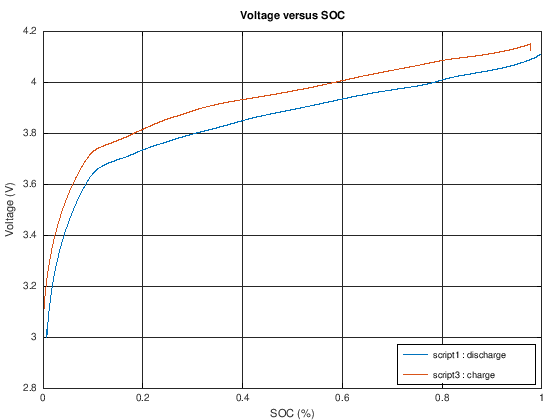

In [24]:
% plot the measured OCV-SOC
% 测试流程中选择的C/30的放电倍率，是为了使端电压尽可能接近OCV
% The discharge rate of C / 30 selected in the test process is to make the terminal voltage as close as possible to OCV
% 观察测试中直接测量到的OCV-SOC
% observe the directly measured OCV-SOC in the experiment

% 先画script1的放电过程
% discharge step of script1
socdis = 1 - ((OCVData.script1.disAh - OCVData.script1.chgAh)/Q25);
socchg = (OCVData.script3.chgAh - OCVData.script3.disAh)/Q25;
plot(socdis, OCVData.script1.voltage);
grid on;
title('Voltage versus SOC');
xlabel('SOC (%)');
ylabel('Voltage (V)');
%画script3的充电过程
% charge step of script3
hold on;
plot(socchg, OCVData.script3.voltage);
legend('script1 : discharge','script3 : charge','location','southeast');

# Compute R0(Rs) estimates   
估计欧姆内阻   
Compute voltage changes at both ends of dis/charge data   
limit discharge/charge voltage changes to no more than two times corresponding voltage change in charge/discharge data

In [17]:
% Place your cursor in this input code cell. Then, type < shift >< enter > to execute
SOC = 0:0.005:1; % output SOC points for this step

indD  = find(OCVData.script1.step == 2); % slow discharge
IR1Da = OCVData.script1.voltage(indD(1)-1) - OCVData.script1.voltage(indD(1)); % at beginning of discharge step
IR2Da = OCVData.script1.voltage(indD(end)+1) - OCVData.script1.voltage(indD(end)); % at end of discharge step

indC  = find(OCVData.script3.step == 2); % slow charge
IR1Ca = OCVData.script3.voltage(indC(1)) - OCVData.script3.voltage(indC(1)-1); % at beginning of charge step
IR2Ca = OCVData.script3.voltage(indC(end)) - OCVData.script3.voltage(indC(end)+1); % at end of charge step

IR1D = min(IR1Da,2*IR2Ca); IR2D = min(IR2Da,2*IR1Ca); % limit discharge delta V
IR1C = min(IR1Ca,2*IR2Da); IR2C = min(IR2Ca,2*IR1Da); % limit charge delta V

# Adjust voltage curves
Compensate dis/charge curves for R0*i(t)   
补偿欧姆内阻 （因为我们使用小电流充放电来使逼近OCV的，要消除其中欧姆内阻造成的偏差）   
Compensate ohmic internal resistance (because we use small current charge and discharge to approach OCV, we must eliminate the deviation caused by ohmic internal resistance)

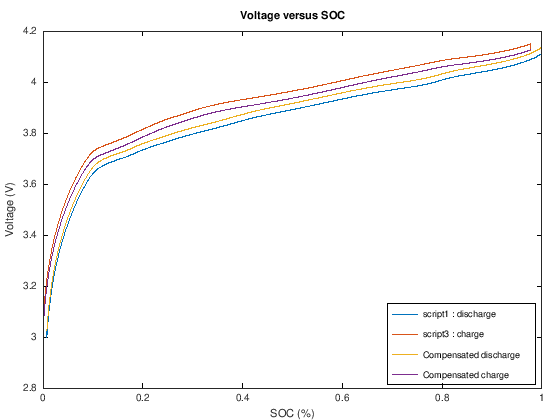

In [25]:
blend = (0:length(indD)-1)/(length(indD)-1);
IRblend = IR1D + (IR2D-IR1D)*blend(:);
disV = OCVData.script1.voltage(indD) + IRblend;
disZ = 1 - OCVData.script1.disAh(indD)/Q25;
disZ = disZ + (1 - disZ(1));  % force initial 100% SOC

blend = (0:length(indC)-1)/(length(indC)-1);
IRblend = IR1C + (IR2C-IR1C)*blend(:);
chgV = OCVData.script3.voltage(indC) - IRblend;
chgZ = OCVData.script3.chgAh(indC)/Q25;
chgZ = chgZ - chgZ(1); % force initial 100% SOC

% 绘图比较
plot(socdis,OCVData.script1.voltage,socchg,OCVData.script3.voltage,disZ,disV,chgZ,chgV)
title('Voltage versus SOC');
xlabel('SOC (%)');
ylabel('Voltage (V)');
%plot(socdis,OCVData.script1.voltage)
%hold on;
%plot(socchg,OCVData.script3.voltage)
%hold on;
%plot(disZ, disV)
%hold on;
%plot(chgZ, chgV)
legend('script1 : discharge', 'script3 : charge', 'Compensated discharge', 'Compensated charge', 'location', 'southeast')

# Compensate for steady-state resistance
rawocv midway between dis/charge voltages at 50% SOC   
这样可以解决放电曲线的低SOC段和充电曲线的高SOC段的数据缺失   
This can solve the lack of data in the low SOC section of the discharge curve and the high SOC section of the charge curve.

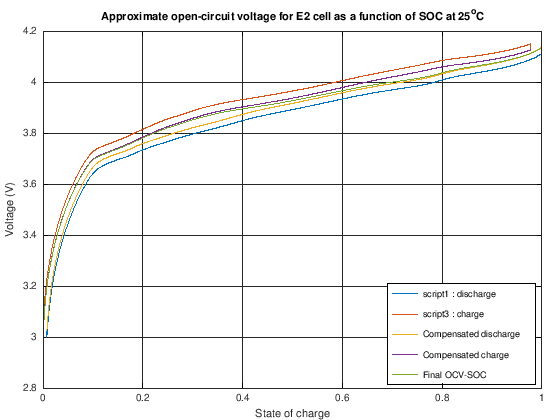

In [26]:
deltaV50 = interp1(chgZ,chgV,0.5) - interp1(disZ,disV,0.5); % interp1 is the function of One-dimensional interpolation
ind = find(chgZ < 0.5);
vChg = chgV(ind) - chgZ(ind)*deltaV50;
zChg = chgZ(ind);
ind = find(disZ > 0.5);
vDis = flipud(disV(ind) + (1 - disZ(ind))*deltaV50);
zDis = flipud(disZ(ind));
rawocv = interp1([zChg; zDis],[vChg; vDis],SOC,'linear','extrap');

% At this point, the pair {SOC,rawocv} form a lookup table for the approximate OCV versus SOC relationship
% We can plot this relationship:
plot(socdis,OCVData.script1.voltage,socchg,OCVData.script3.voltage,disZ,disV,chgZ,chgV,SOC,rawocv)
legend('script1 : discharge', 'script3 : charge', 'Compensated discharge', 'Compensated charge','Final OCV-SOC' ,'location', 'southeast')
xlabel('State of charge')
ylabel('Voltage (V)') 
grid on
title('Approximate open-circuit voltage for E2 cell as a function of SOC at 25^oC')